In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
mpl.style.use("default")

# Generate data

### Set random seed

In [2]:
np.random.seed(1)

### Generating data with two normally distributed attributes

In [3]:
# Initialize function to create data
def create_data (center, label, std = 2.5, n_observations = 2000 ):
    distr = np.random.normal(center, std, (n_observations, 2) )
    labels =  np.repeat( [label], n_observations).reshape(-1,1)
    return np.hstack ( (distr, labels) )
    
    
    
# Generating data  

first_distr = create_data(3, 0)
second_distr = create_data(-3, 1)

data = np.vstack( (first_distr, second_distr) )

In [4]:
data

array([[ 7.06086341,  1.47060897,  0.        ],
       [ 1.67957062,  0.31757844,  0.        ],
       [ 5.16351907, -2.75384674,  0.        ],
       ...,
       [-2.35811268, -3.95326711,  1.        ],
       [-0.40778381, -1.32066102,  1.        ],
       [-1.72359794, -0.48467173,  1.        ]])

Text(0.5, 1.0, 'Classification')

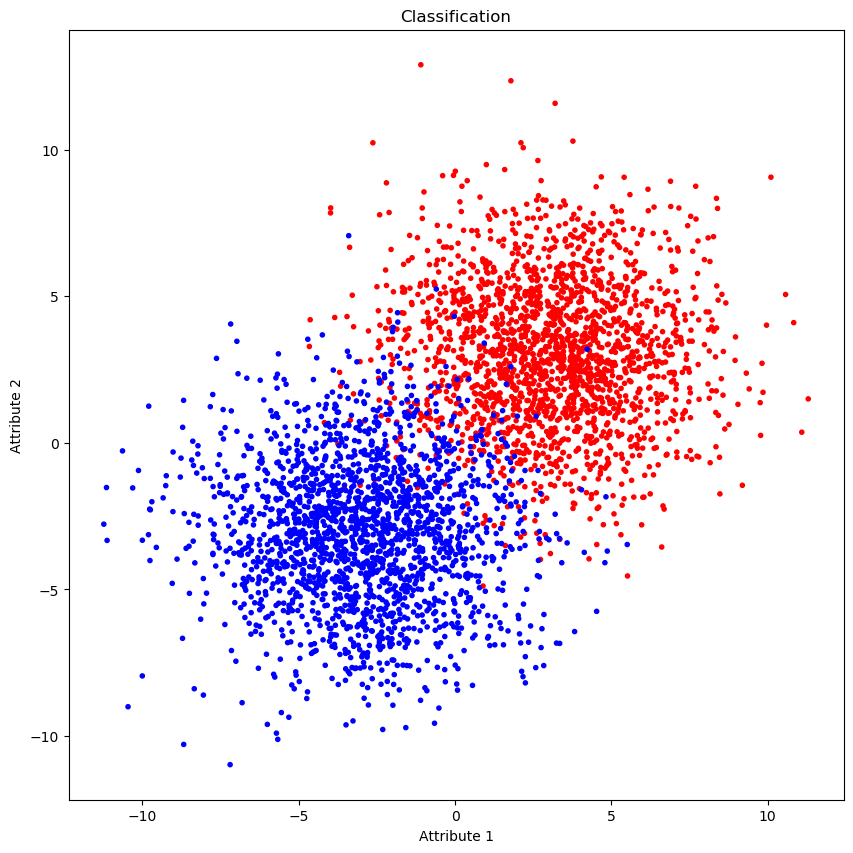

In [5]:
colors = [ "red", "blue" ]

fig = plt.figure(figsize=(10,10))
plt.scatter(x = data[: , 0], 
                y = data[: , 1], 
                c = data[: , 2],
                cmap = mpl.colors.ListedColormap(colors), 
                marker = ".")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.title("Classification")

### Logit 

In [132]:
logit_sk = LogisticRegression(penalty = 'none', random_state = 10)
logit_sk.fit(data[: , : 2], data[: , 2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
print ("Intercept is equal to ", logit_sk.intercept_[0])
print ("Coefficients are equal to ", logit_sk.coef_)

Intercept is equal to  0.08994893304460233
Coefficients are equal to  [[-0.99354536 -1.03150971]]


In [134]:
from statsmodels.discrete.discrete_model import Logit

logit = Logit( data[: , 2] ,data[: , : 2] )
results = logit.fit()
print (results.summary())

Optimization terminated successfully.
         Current function value: 0.106404
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.8465
Time:                        17:08:28   Log-Likelihood:                -425.62
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9909      0.050    -20.000      0.000      -1.088      -0.894
x2            -1.0300      0.

In [111]:
from sklearn.metrics import accuracy_score
import random

random.seed(1)

sample_data = np.array (random.sample (data.tolist(), int (data.shape[0] / 2) ))
score = accuracy_score( sample_data[: , 2], logit_sk.predict(sample_data[: , : 2]) )
score

0.958

In [154]:
coefs = logit_sk.coef_[0].tolist()
x * coefs[0], y * coefs[1]

(array([ 11.1646143 ,  10.70758662,  10.25055894,   9.79353126,
          9.33650358,   8.8794759 ,   8.42244822,   7.96542053,
          7.50839285,   7.05136517,   6.59433749,   6.13730981,
          5.68028213,   5.22325445,   4.76622677,   4.30919909,
          3.85217141,   3.39514372,   2.93811604,   2.48108836,
          2.02406068,   1.567033  ,   1.11000532,   0.65297764,
          0.19594996,  -0.26107772,  -0.7181054 ,  -1.17513309,
         -1.63216077,  -2.08918845,  -2.54621613,  -3.00324381,
         -3.46027149,  -3.91729917,  -4.37432685,  -4.83135453,
         -5.28838221,  -5.7454099 ,  -6.20243758,  -6.65946526,
         -7.11649294,  -7.57352062,  -8.0305483 ,  -8.48757598,
         -8.94460366,  -9.40163134,  -9.85865902, -10.31568671,
        -10.77271439, -11.22974207]),
 array([ 11.32240852,  10.81985178,  10.31729503,   9.81473829,
          9.31218154,   8.8096248 ,   8.30706805,   7.80451131,
          7.30195456,   6.79939782,   6.29684107,   5.79428433,
  

In [161]:
X = data[: , :2]
y = data[: , 2]

In [175]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
np.linspace(-3, 3, 50))

In [180]:
xx

array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       ...,
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ]])

In [182]:
xx.ravel()

array([-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
        2.87755102,  3.        ])

In [186]:
np.vstack ( (xx.ravel(), yy.ravel()) )

array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -3.        , -3.        , ...,  3.        ,
         3.        ,  3.        ]])

In [189]:
Z = logit_sk.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
Z

array([0.99790293, 0.99763228, 0.99732679, ..., 0.00319841, 0.00283307,
       0.00250936])

In [199]:
logit_sk.predict_proba(X)

array([[9.99784490e-01, 2.15510242e-04],
       [8.70610327e-01, 1.29389673e-01],
       [9.00215546e-01, 9.97844543e-02],
       ...,
       [1.48526712e-03, 9.98514733e-01],
       [1.35009273e-01, 8.64990727e-01],
       [9.09272602e-02, 9.09072740e-01]])

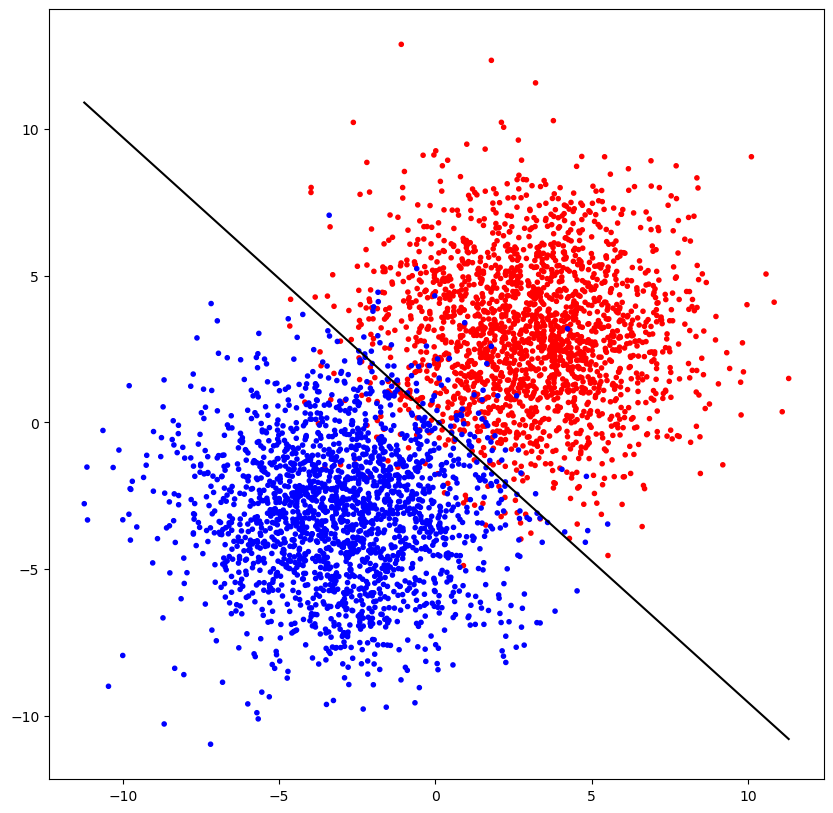

In [203]:
colors = [ "red", "blue" ]

fig = plt.figure(figsize=(10,10))

plt.scatter(x = data[: , 0], 
                y = data[: , 1], 
                c = data[: , 2],
                cmap = mpl.colors.ListedColormap(colors), 
                marker = ".")

x = np.linspace (data[: , 0].min(), data[: , 0].max())

coefs = logit_sk.coef_[0].tolist()
a = -coefs[0] / coefs[1]

y = a * x - logit_sk.intercept_[0] / coefs[1]
plt.plot(x, y, 'k-')